In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
PATH_TO_FOLDER = '/content/drive/My Drive/gei-project'

In [0]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
%matplotlib inline
%matplotlib notebook
sys.path.append(PATH_TO_FOLDER)
sys.path.append(os.path.join(PATH_TO_FOLDER,"models/research"))
sys.path.append(os.path.join(PATH_TO_FOLDER,"models/research/object_detection/utils"))

import sys
sys.path.append(os.path.join(PATH_TO_FOLDER))
PATH_TO_CKPT = os.path.join(PATH_TO_FOLDER,'Penguin-Logistics_ckpt/frozen_inference_graph.pb')
PATH_TO_LABELS = os.path.join(PATH_TO_FOLDER,'training/label_map.pbtxt')
from utils import label_map_util
import visualization_utils as vis_util
from google.colab.patches import cv2_imshow

In [0]:
def predict(PATH_TO_IMAGE):

  

  NUM_CLASSES = 6

  label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
  categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
  category_index = label_map_util.create_category_index(categories)

  detection_graph = tf.Graph()
  with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
      with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
          serialized_graph = fid.read()
          od_graph_def.ParseFromString(serialized_graph)
          tf.import_graph_def(od_graph_def, name='')

      sess = tf.Session(graph=detection_graph)

  image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')


  detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')


  detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
  detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

  num_detections = detection_graph.get_tensor_by_name('num_detections:0')


  image = cv2.imread(PATH_TO_IMAGE)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_expanded = np.expand_dims(image_rgb, axis=0)

  (boxes, scores, classes, num) = sess.run(
      [detection_boxes, detection_scores, detection_classes, num_detections],
      feed_dict={image_tensor: image_expanded})


  vis_util.visualize_boxes_and_labels_on_image_array(
      image,
      np.squeeze(boxes),
      np.squeeze(classes).astype(np.int32),
      np.squeeze(scores),
      category_index,
      use_normalized_coordinates=True,
      line_thickness=5,
      min_score_thresh=0.75)

  H,W,_ = image.shape
  im = cv2.resize(image, (int(W),int(H)))
  count = 0
  for score in np.squeeze(scores) :
    if score >= 0.75 : count += 1
    else : None

  cv2_imshow(im)
  for i in range(0,count) :
    class_name = category_index[np.squeeze(classes)[i].astype(np.int32)]['name']
    if np.squeeze(scores)[i] >= 0.75 :
      print(class_name,'\t',np.squeeze(scores)[i])
    else : None


In [0]:
from os import listdir
from os.path import join

def predict_dir(PATH_TO_DIR) :
  filename = listdir(PATH_TO_DIR)
  for i in range(0,len(filename)) :
    if filename[i].endswith('.jpg') |  filename[i].endswith('.png')|filename[i].endswith('.jpeg') :
      predict(join(PATH_TO_DIR,filename[i]))

1 Pic

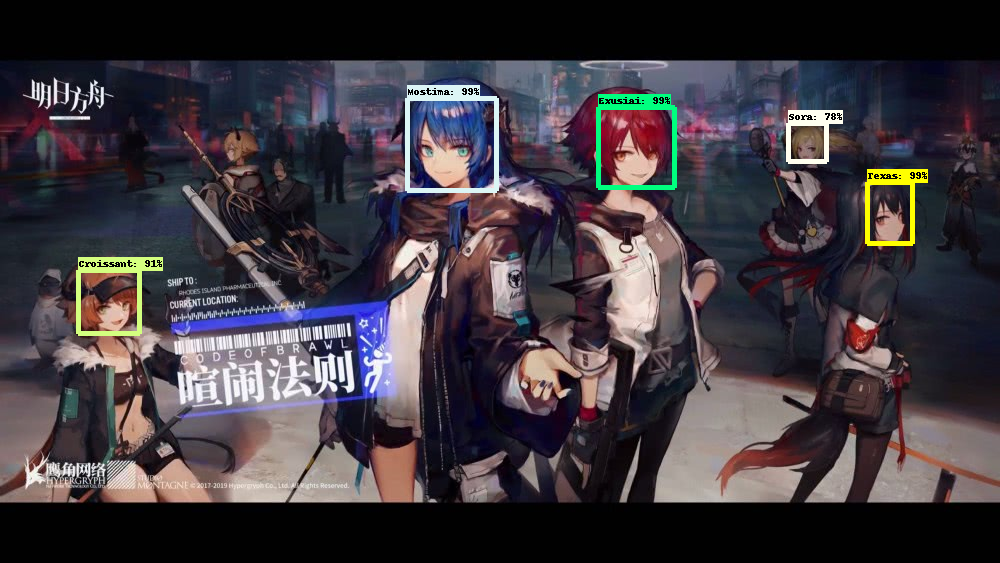

Mostima 	 0.99760133
Texas 	 0.9964139
Exusiai 	 0.99296653
Croissant 	 0.9134686
Sora 	 0.78465116


In [62]:
predict('/content/drive/My Drive/gei-project/TestImages/1000.jpeg')

From folder


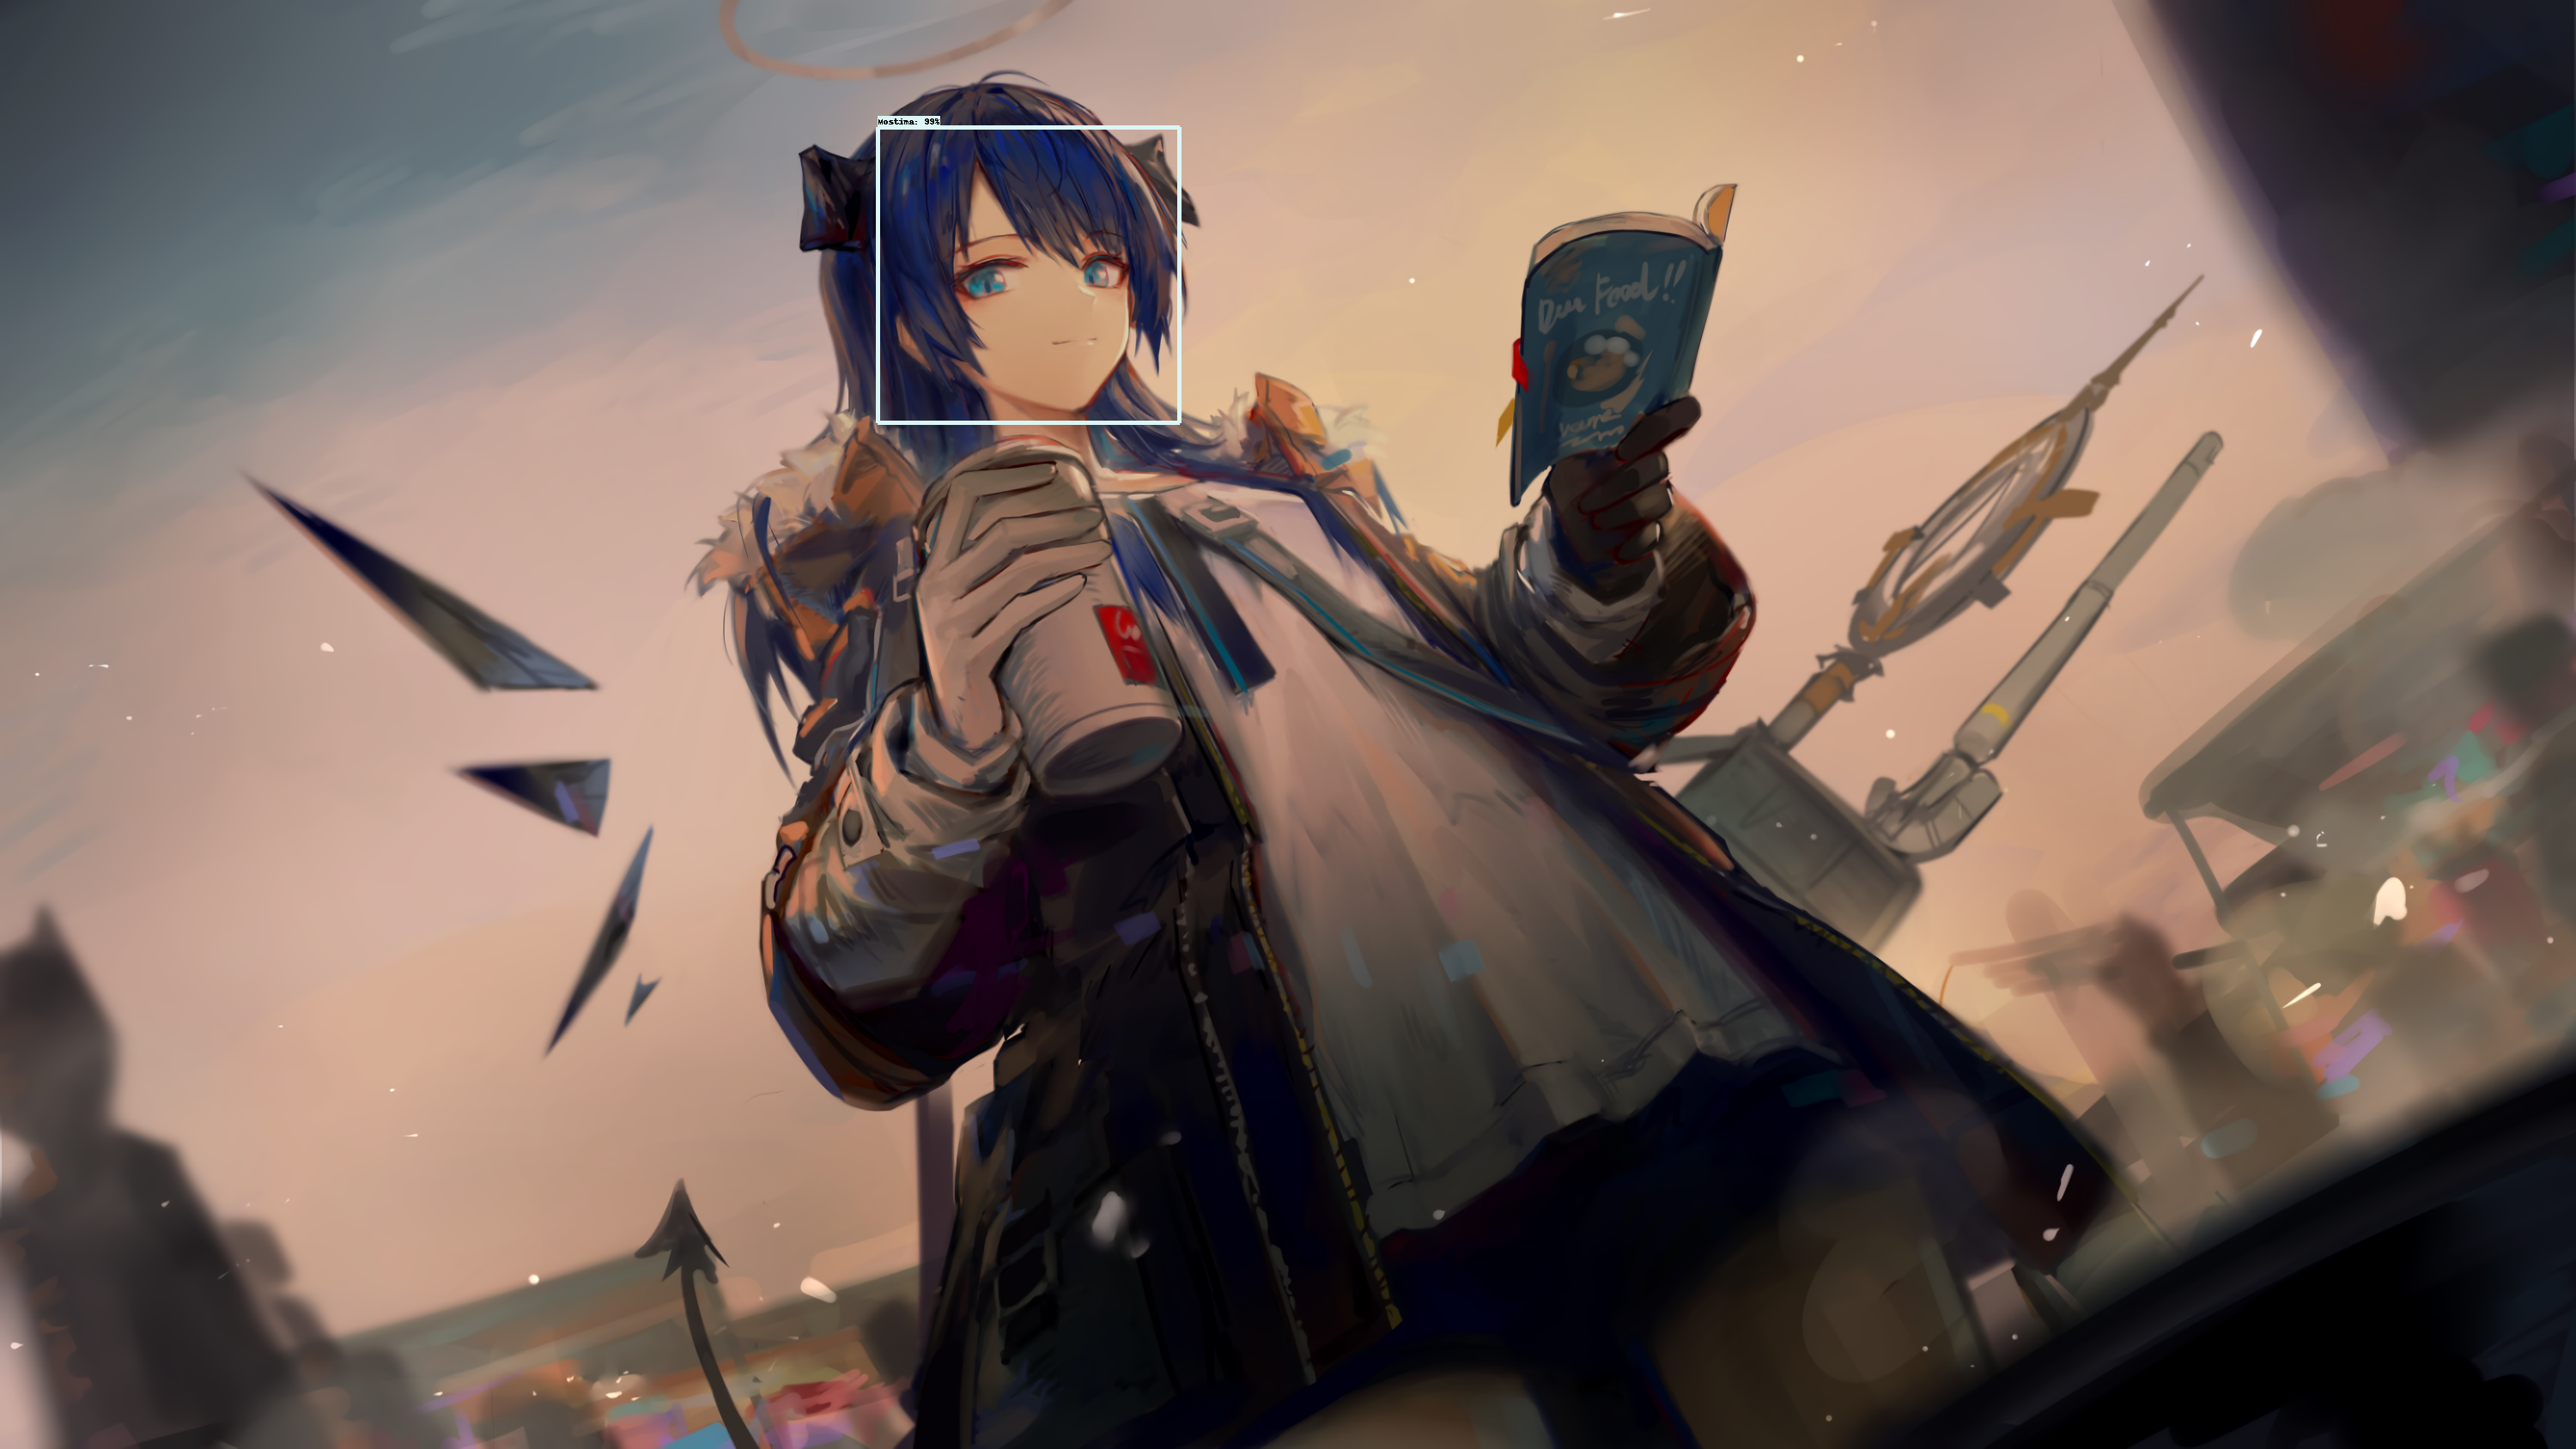

Mostima 	 0.9982169


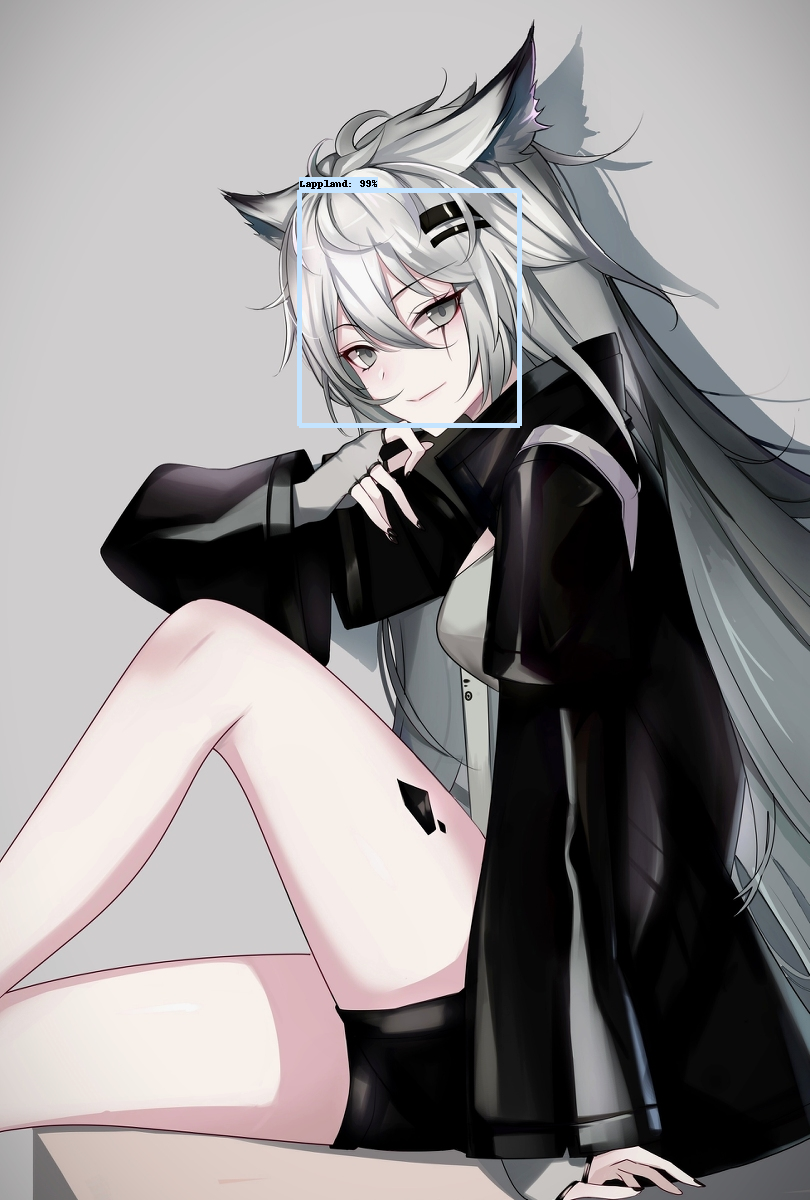

Lappland 	 0.9989492


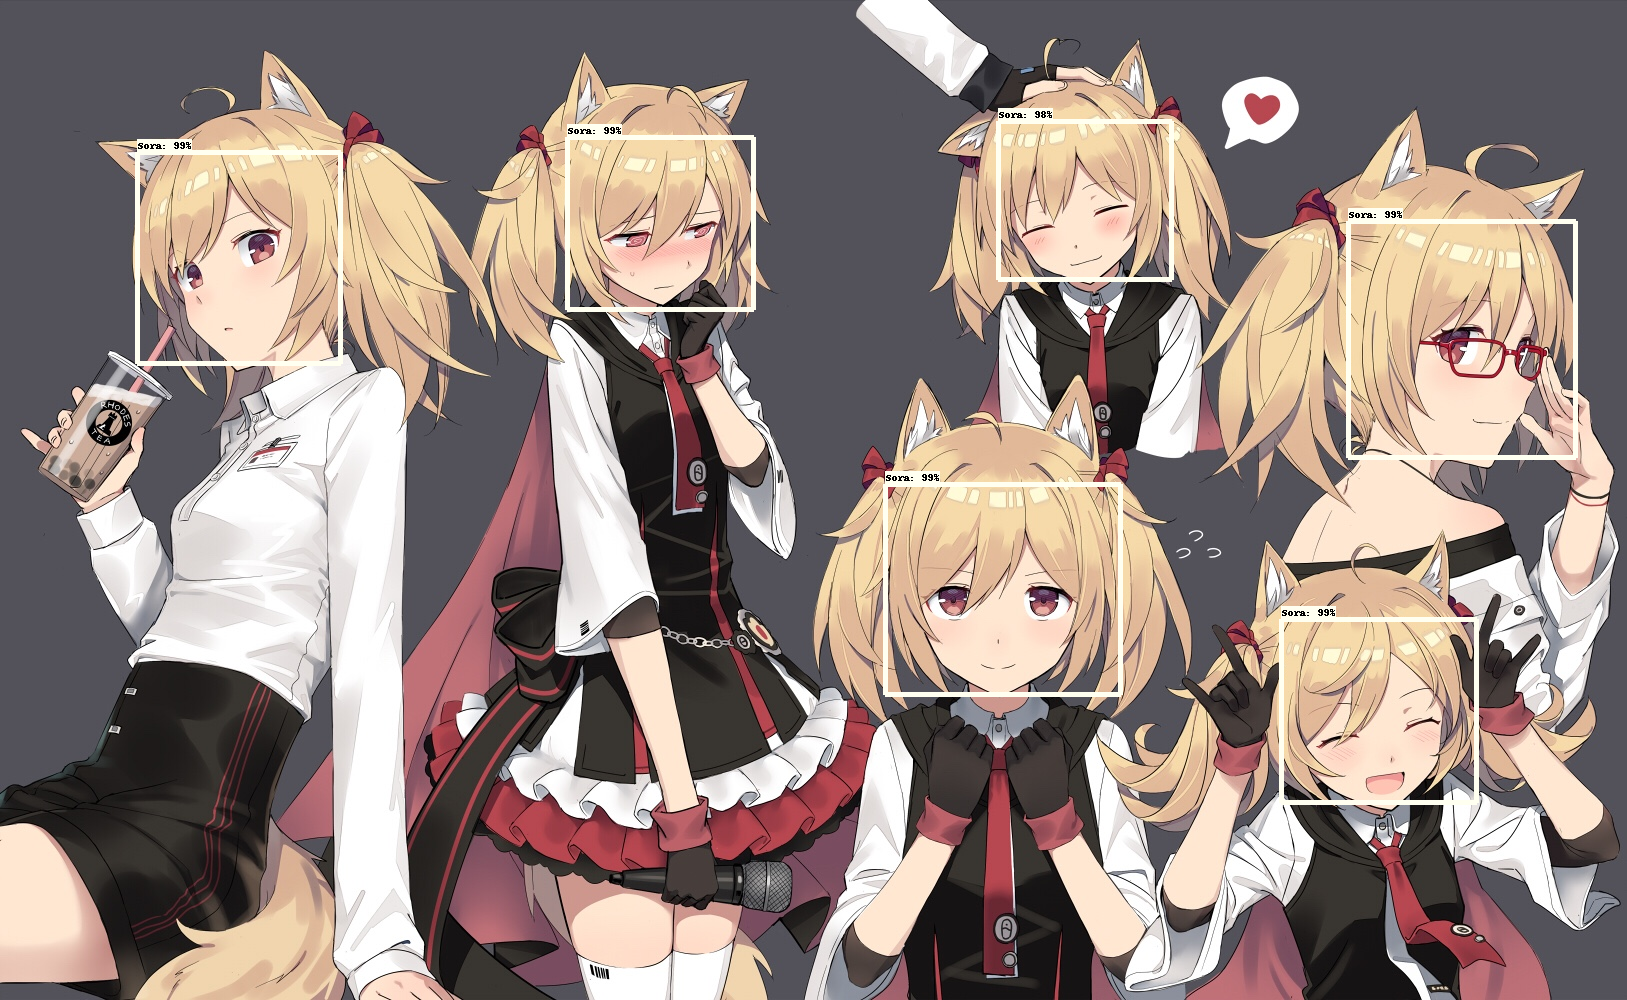

Sora 	 0.995374
Sora 	 0.9929892
Sora 	 0.9927834
Sora 	 0.9903132
Sora 	 0.99002224
Sora 	 0.9822459


In [53]:
predict_dir('/content/drive/My Drive/gei-project/TestImages/brueh')